In [1]:
import pandas as pd

# Read the US pumpkins CSV file
pumpkins = pd.read_csv('../data/US-pumpkins.csv')

# Filter out any rows that don't use price per bushel
pumpkins = pumpkins[pumpkins['Package'].str.contains('bushel', case=True, regex=True)]

pumpkins.head()


,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
70,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
71,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,9/24/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
72,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,18.0,18.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
73,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/1/16,17.0,17.0,17.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
74,BALTIMORE,NaN,1 1/9 bushel cartons,PIE TYPE,NaN,NaN,10/8/16,15.0,15.0,15.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [2]:
pumpkins.isnull().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

In [3]:
# Define the columns we want to keep
new_columns = ['Package', 'Month', 'Low Price', 'High Price', 'Date']

# Drop all other columns
pumpkins = pumpkins.drop([c for c in pumpkins.columns if c not in new_columns], axis=1)


In [4]:
# Calculate the average price from the high and low price columns
price = (pumpkins['Low Price'] + pumpkins['High Price']) / 2

# Get the month from the date column
month = pd.DatetimeIndex(pumpkins['Date']).month

# Create a new data frame with these columns
new_pumpkins = pd.DataFrame({'Month': month, 
                             'Package': pumpkins['Package'], 
                             'Low Price': pumpkins['Low Price'], 
                             'High Price': pumpkins['High Price'], 
                             'Price': price})


In [5]:
new_pumpkins.head()

,Month,Package,Low Price,High Price,Price
70,9,1 1/9 bushel cartons,15.0,15.0,15.0
71,9,1 1/9 bushel cartons,18.0,18.0,18.0
72,10,1 1/9 bushel cartons,18.0,18.0,18.0
73,10,1 1/9 bushel cartons,17.0,17.0,17.0
74,10,1 1/9 bushel cartons,15.0,15.0,15.0


In [6]:
new_pumpkins.tail()

,Month,Package,Low Price,High Price,Price
1738,9,1/2 bushel cartons,15.00,15.0,15.000
1739,9,1/2 bushel cartons,13.75,15.0,14.375
1740,9,1/2 bushel cartons,10.75,15.0,12.875
1741,9,1/2 bushel cartons,12.00,12.0,12.000
1742,9,1/2 bushel cartons,12.00,12.0,12.000


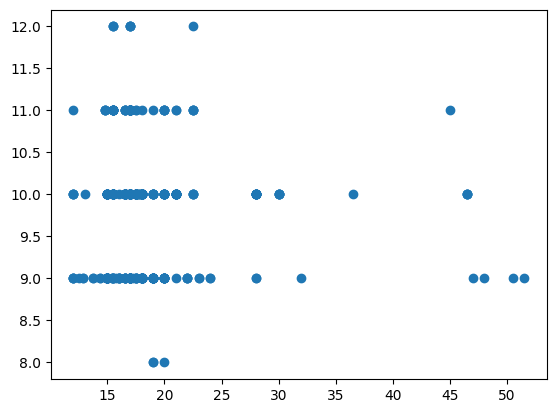

In [7]:
import matplotlib.pyplot as plt

# Get the values we want to plot
price = new_pumpkins.Price
month = new_pumpkins.Month

# Create and show a scatter plot of price vs month
plt.scatter(price, month)
plt.show()


Text(0, 0.5, 'Pumpkin Price')

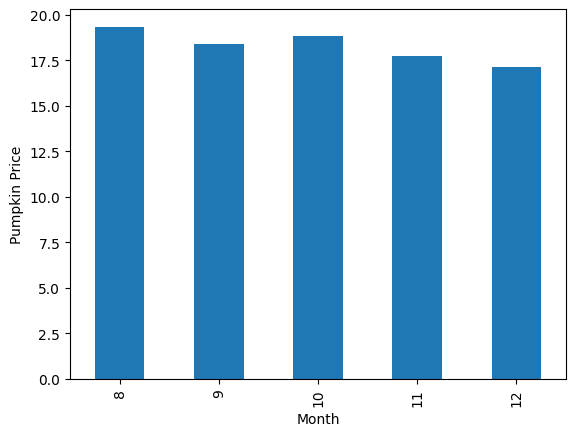

In [8]:
# Group the pumpkins into a bar chart by month and price
new_pumpkins.groupby(['Month'])['Price'].mean().plot(kind='bar')

# Add a label to the bar chart
plt.ylabel('Pumpkin Price')
